Test plot
<_csv.reader object at 0x0000006ACF39EA08> None
fin du test


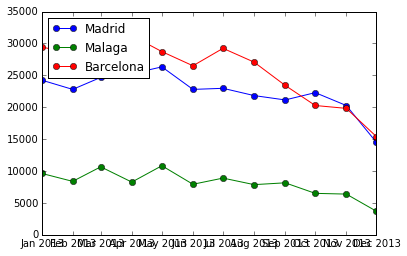

In [3]:
#!/usr/bin/python
# vim: set fileencoding=utf-8 :
%matplotlib inline


import os
import sys
import getopt
import gzip
import bz2
import csv, codecs
import itertools
import operator

import pylab
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
import datetime

from itertools import groupby


mal={}

mad={}

bcn={}

def get_month(d):
    return datetime.datetime.strptime(d, '%Y-%m-%d').month






def count_lines2(file_name):
    fd = bz2.BZ2File(file_name, 'rb')
    c = codecs.iterdecode(fd, "utf-8")

    n = 0
    print ("Test plot")
    reader = csv.reader(c, delimiter='^')
    print(reader, None)  # skip header

    p=0
    maliste = []
    for line in reader :  
        p = p + 1
        if(len(line)>=7 and line[6]=="AGP"):
            if(len(mal)!=0 and line[0][:7] in mal.keys()):
                mal[line[0][:7]] = mal[line[0][:7]]+1
            else:
                mal[line[0][:7]] = 1
           

        elif(len(line)>=7 and line[6]=="MAD"):
            if(len(mad)!=0 and line[0][:7] in mad.keys()):                
                mad[line[0][:7]] = mad[line[0][:7]]+1
            else:
                mad[line[0][:7]] = 1


        elif(len(line)>=7 and line[6]=="BCN"):
            if(len(bcn)!=0 and line[0][:7] in bcn.keys()):
                bcn[line[0][:7]] = bcn[line[0][:7]]+1
            else:
                bcn[line[0][:7]] = 1

      #  if(p>=999999):
       #     return 0
    print("fin du test")

count_lines2(r'C:\Users\piepie\Downloads\searches.csv.bz2')

dates_find=[]



for d in mad.keys():
    dates_find.append(d)

dates_find.sort()

dates_datetime = []
listmal= []
listmad= []
listbcn = []


for d in dates_find:
   dates_datetime.append(datetime.datetime.strptime(d, '%Y-%m'))
   listmad.append(mad.get(d))
   listmal.append(mal.get(d))
   listbcn.append(bcn.get(d))
dates_float = matplotlib.dates.date2num(dates_datetime)

plt.plot_date(dates_float, listmad, linestyle='-', xdate=True, ydate=False)
plt.plot_date(dates_float, listmal, linestyle='-', xdate=True, ydate=False)
plt.plot_date(dates_float, listbcn, linestyle='-', xdate=True, ydate=False)

plt.legend(['Madrid', 'Malaga','Barcelona'], loc='upper left')



pylab.show()




